# Bank Marketing :Term Deposit Prediction  

**Prepared for FLIP ROBO by Olumide Ikumapayi-DS2306**

# About The Bank term deposit dataset

This dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.For more information you can check the links to the dataset: •	https://github.com/dsrscientist/dataset5
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv


The flow of this machine learning exercise is as follows:

1. [Import Necessary Libraries](#Import-Necessary-Libraries)
2. [Importing The Bank Term Deposit Dataset](#Importing-The-Bank-Term-Deposit-Dataset)
3. [Exploratory Data Analysis(EDA)](#Exploratory-Data-Analysis-(EDA))
4. [Data Visualization](#Data-Visualization)
5. [Data Preprocessing](#Data-Preprocessing)
6. [The Machine Learning Model Training,Evaluation and Predictions](#The-Machine-Learning-Model-Training,-Evaluation-and-Predictions)

  * i.  [Random Forest Classifier](#Random-Forest-Classifier)
  * ii. [Logistic Regression](#Logistic-Regression)
  * iii.[Decision Tree Classifier](#Decision-Tree-Classifier)
  * iv. [Support Vector Machine](#Support-Vector-Machine)
7. [Summary and Conclusion](#Summary-and-Conclusion)

# Import Necessary Libraries

Importing all necessary libraries for data manipulation, visualization, and machine learning(ML).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Importing The Bank Term Deposit Dataset 

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
# Combine train and test data for consistent label encoding
combined_data = pd.concat([train_data, test_data], axis=0)

In [5]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [6]:
train_data.head(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [7]:
train_data.tail(30)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31617,5806,28,technician,married,secondary,no,880,yes,no,unknown,26,may,188,1,-1,0,unknown,no
31618,8778,21,blue-collar,single,secondary,yes,-59,yes,yes,unknown,4,jun,83,1,-1,0,unknown,no
31619,1159,59,retired,married,unknown,no,0,no,no,unknown,8,may,425,6,-1,0,unknown,no
31620,15317,45,management,married,tertiary,no,726,yes,yes,cellular,18,jul,199,1,-1,0,unknown,no
31621,28819,32,services,divorced,secondary,no,130,yes,no,cellular,30,jan,194,3,-1,0,unknown,no
31622,44152,79,retired,divorced,primary,no,2787,no,no,telephone,13,jul,617,1,377,1,success,yes
31623,22175,57,technician,single,secondary,no,104,no,no,cellular,21,aug,297,2,-1,0,unknown,no
31624,40354,50,management,married,tertiary,no,5108,yes,no,cellular,19,jun,140,2,-1,0,unknown,no
31625,4516,56,entrepreneur,married,tertiary,no,8741,yes,no,unknown,20,may,318,3,-1,0,unknown,no
31626,4031,57,retired,married,primary,no,70,yes,yes,unknown,16,may,186,5,-1,0,unknown,no


In [8]:
# Displaying the first few rows of the dataset
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# Exploratory Data Analysis(EDA)

Exploring the dataset in order to gain insights by Checking for missing values, summary statistics, and visualize the data.

In [9]:
#Checking the dimension of the dataset
df.shape

(31647, 18)

This dataset contains 31647 rows and 18 columns.Out of which 1 is target variable and the remaining 17 are independent varbiables.

In [10]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [11]:
# Checking the columns of dataset
df.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [12]:
# checking the types of columns
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

There two(2) different types of data(int64 and object) present in the dataset.

In [13]:
#checking the null values
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [14]:
df.isnull().sum().sum()

0

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


As we can see there were no null values present in this dataset.

<AxesSubplot:>

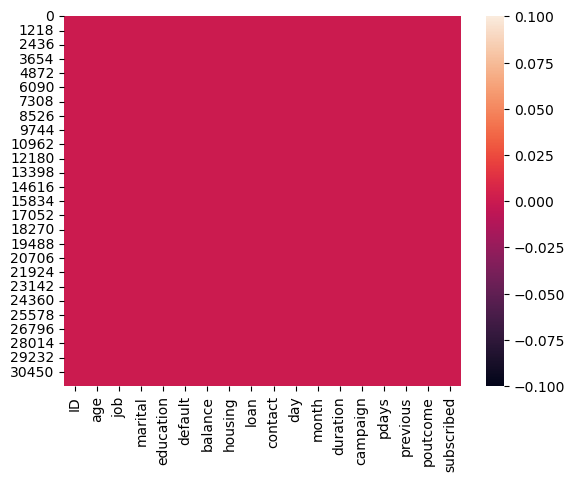

In [16]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

And we can clearly visualize there is no missing data present.

In [17]:
# To get good overview of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


This gives the brief about the dataset which includes indexing type,column type,no null values and memory usage.

In [18]:
# Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [19]:
train_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


no     27932
yes     3715
Name: subscribed, dtype: int64


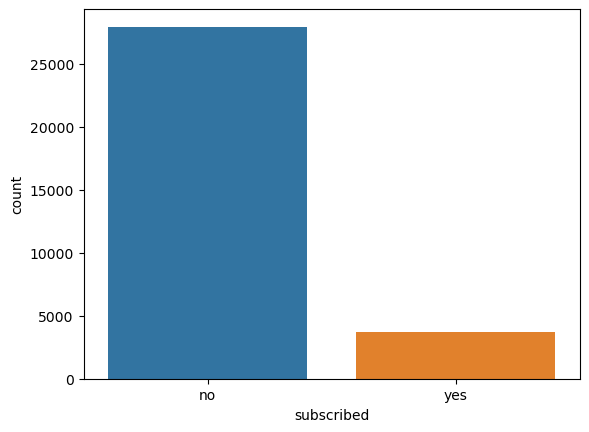

In [20]:
# Visualize the number of Subscribed customers
ax = sns.countplot(x='subscribed', data=df)
print(df['subscribed'].value_counts())

# Data Preprocessing

In [21]:
# Handling missing values (if any)
train_data.dropna(inplace=True)

In [22]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'pdays', 'poutcome']
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])

In [23]:
# Spliting the data into features (X) and target variable (y)
X = train_data.drop(columns=['ID', 'subscribed'])
y = train_data['subscribed']

# Spliting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## The Machine Learning Model Training,Evaluation and Predictions

# Random Forest Classifier

In [24]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
# The rf model evaluation
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Model: {RandomForestClassifier}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print('-' * 40)

Model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 0.9052132701421801
Confusion Matrix:
[[5405  194]
 [ 406  325]]
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      5599
         yes       0.63      0.44      0.52       731

    accuracy                           0.91      6330
   macro avg       0.78      0.70      0.73      6330
weighted avg       0.90      0.91      0.90      6330

----------------------------------------


# Logistic Regression

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# The Logistic Regression model evaluation
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Model: {LogisticRegression}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print('-' * 40)

Model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy: 0.8872037914691943
Confusion Matrix:
[[5467  132]
 [ 582  149]]
Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      5599
         yes       0.53      0.20      0.29       731

    accuracy                           0.89      6330
   macro avg       0.72      0.59      0.62      6330
weighted avg       0.86      0.89      0.86      6330

----------------------------------------


# Decision Tree Classifier

In [28]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# The Decision Tree Classifier model evaluation
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Model: {DecisionTreeClassifier}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print('-' * 40)

Model: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy: 0.8682464454976303
Confusion Matrix:
[[5141  458]
 [ 376  355]]
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.92      0.92      5599
         yes       0.44      0.49      0.46       731

    accuracy                           0.87      6330
   macro avg       0.68      0.70      0.69      6330
weighted avg       0.87      0.87      0.87      6330

----------------------------------------


# Support Vector Machine

In [30]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [31]:
# The Support Vector Machine model evaluation
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Model: {SVC}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print('-' * 40)

Model: <class 'sklearn.svm._classes.SVC'>
Accuracy: 0.8843601895734597
Confusion Matrix:
[[5595    4]
 [ 728    3]]
Classification Report:
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      5599
         yes       0.43      0.00      0.01       731

    accuracy                           0.88      6330
   macro avg       0.66      0.50      0.47      6330
weighted avg       0.83      0.88      0.83      6330

----------------------------------------


# Summary and Conclusion

The Random Forest Classifier demonstrates high precision (0.93) and recall (0.97) for the "No" class, resulting in a high F1-score (0.95). This indicates that the model accurately predicts "No" and captures most instances of "No". However, for the "Yes" class, the model has lower precision (0.63) and recall (0.43), resulting in a lower F1-score (0.51). This suggests that the model has more false positives and misses some instances of "Yes". The overall accuracy of this model is 0.90, indicating it correctly predicts the target variable for 90% of cases.

In contrast, the Logistic Regression model demonstrates good precision (0.90) and recall (0.98) for the "No" class, resulting in a high F1-score (0.94). This indicates that the model is precise in predicting "No" and captures most instances of "No". However, for the "Yes" class, the model has lower precision (0.53) and recall (0.20), resulting in a lower F1-score (0.29). This suggests that the model has a higher rate of false positives and misses some instances of "Yes".

The Decision Tree Classifier demonstrates good precision (0.93) and recall (0.92) for the "No" class, resulting in a decent F1-score (0.92). However, it exhibits lower precision (0.43) and recall (0.46) for the "Yes" class, leading to an F1-score of 0.44. The model's overall accuracy is 0.87, which is slightly lower compared to both the Random Forest and Logistic Regression models.

In contrast, the Support Vector Machine (SVM) model displays good precision (0.88) and high recall (1.00) for the "No" class, resulting in a high F1-score of 0.94. This suggests that the model accurately predicts instances belonging to the "No" class and captures all actual instances of "No". However, for the "Yes" class, it has very low precision (0.43) and almost no recall (0.00), leading to a very low F1-score of 0.01. This indicates that the model struggles to correctly predict instances belonging to the "Yes" class. The overall accuracy of this SVM model is 0.88, which is quite good for the "No" class.

In summary, the Random Forest Classifier appears to be the best model overall, as it has the highest accuracy and reasonably good performance in predicting both "No" and "Yes" classes. The Logistic Regression model also has high accuracy and good precision and recall for the "No" class, but it struggles with the "Yes" class. The Decision Tree Classifier and SVM models have lower overall accuracy and less balanced performance across the two classes.